In [189]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [190]:
# The Chicago Park District takes bacteria samples at beaches across the city.  The amount of times
# between visits and the frequency seem inconsistent across beaches.
# The U.S. EPA recommends a swim ban as e-coli levels higher than 235 CTU.  A swim ban at 1000 CTU.
# This notebook takes a look at the number of samples taken at various beaches that exceeded these levels.

In [191]:
# Data set comes from city of Chicago open data portal
# Each row indicates a sample (or pair of samples) taken at a beach
beach_rows = pd.read_csv('data/Beach_Lab_Data.csv')

# Get rid of rows without a beach associated with it
beach_rows = beach_rows.loc[~beach_rows['Beach'].isnull()]
beach_rows.head()

,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Culture Note,Culture Sample Interval,Culture Sample 2 Timestamp,DNA Test ID,DNA Sample Timestamp,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude,Location
376,103919,05/29/2007 12:00:00 AM,South Shore,16.0,6.3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.7689,-87.5636,"(41.7689, -87.5636)"
377,110945,06/18/2014 12:00:00 AM,Howard,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0188,-87.6663,"(42.0188, -87.6663)"
378,91005,07/15/2009 12:00:00 AM,12th Street,167.0,178.9,172.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.8638,-87.6083,"(41.8638, -87.6083)"
379,95216,08/21/2015 12:00:00 AM,Juneway,3.0,1.0,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0224,-87.6674,"(42.0224, -87.6674)"
380,90110,06/21/2011 12:00:00 AM,Calumet,3.0,2.0,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.7142,-87.5299,"(41.7142, -87.5299)"


In [192]:
# Each row has one or two samples taken at a beach at a time.  It also lists a mean.  For now, we'll use the city's
# calculated mean.  May be worthwhile to revisit later.
# Are there any rows that have no mean?
beach_rows = beach_rows.rename(index=str, columns={'Culture Reading Mean': 'sample_reading'})
beach_rows.loc[beach_rows['sample_reading'].isnull()]

,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,sample_reading,Culture Note,Culture Sample Interval,Culture Sample 2 Timestamp,DNA Test ID,DNA Sample Timestamp,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude,Location
1615,104765,07/03/2006 12:00:00 AM,Juneway,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0224,-87.6674,"(42.0224, -87.6674)"
2468,104751,07/03/2006 12:00:00 AM,Oak Street,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.9032,-87.6235,"(41.9032, -87.6235)"
3180,104753,07/03/2006 12:00:00 AM,Montrose,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.9655,-87.6385,"(41.9655, -87.6385)"
4019,104764,07/03/2006 12:00:00 AM,Rogers,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0213,-87.6666,"(42.0213, -87.6666)"
5726,104743,07/03/2006 12:00:00 AM,Rainbow,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.7580,-87.5510,"(41.758, -87.551)"
5987,104744,07/03/2006 12:00:00 AM,South Shore,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.7689,-87.5636,"(41.7689, -87.5636)"
6178,104750,07/03/2006 12:00:00 AM,Ohio Street,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.8935,-87.6152,"(41.8935, -87.6152)"
6546,104754,07/03/2006 12:00:00 AM,Foster,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.9785,-87.6515,"(41.9785, -87.6515)"
6576,104763,07/03/2006 12:00:00 AM,Howard,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0188,-87.6663,"(42.0188, -87.6663)"
7801,104746,07/03/2006 12:00:00 AM,57th Street,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.7911,-87.5797,"(41.7911, -87.5797)"


In [193]:
beach_summary = pd.DataFrame(beach_rows['Beach'].unique())
beach_summary.columns = ['beach_name']
print("There are %s beaches." % len(beach_summary))

There are 27 beaches.


In [194]:
samples_by_beach = pd.DataFrame(beach_rows.groupby('Beach').count()['Culture Test ID'].sort_values(ascending=False))
samples_by_beach.columns = ['num_samples']
samples_by_beach['beach_name'] = samples_by_beach.index.values
beach_summary = beach_summary.merge(samples_by_beach, on='beach_name')
beach_summary.head()

,beach_name,num_samples
0,South Shore,825
1,Howard,793
2,12th Street,824
3,Juneway,789
4,Calumet,890


In [195]:
# For a given beach, calculate the number of samples taken that exceeded that threshold
def exceeds_threshold(beach, threshold):
    by_beach = pd.DataFrame(beach_rows.loc[beach_rows['sample_reading'] >= threshold].groupby('Beach')
                 .count()['Culture Test ID']).to_dict()['Culture Test ID']
    # Make sure the beach is even in the list.  Return 0 if not
    if beach in by_beach:
        return by_beach[beach]
    else:
        return 0
exceeds_threshold('Calumet', 235)

205

In [196]:
# Test
exceeds_threshold('Fargo', 1000)

0

In [197]:
beach_summary['samples_235'] = beach_summary['beach_name'].apply(lambda x: exceeds_threshold(x, 235))
beach_summary['samples_1000'] = beach_summary['beach_name'].apply(lambda x: exceeds_threshold(x, 1000))
beach_summary.head()

,beach_name,num_samples,samples_235,samples_1000
0,South Shore,825,172,31
1,Howard,793,49,6
2,12th Street,824,119,26
3,Juneway,789,52,5
4,Calumet,890,205,54


In [198]:
# Which beaches have the highest number of samples taken with fecal level >= 1000?
beach_summary.sort_values('samples_1000', ascending=False)[:10]

,beach_name,num_samples,samples_235,samples_1000
7,63rd Street,850,239,80
6,Montrose,868,225,73
13,Rainbow,846,210,55
4,Calumet,890,205,54
22,Margaret T Burroughs,834,169,49
21,Montrose Dog,440,118,41
0,South Shore,825,172,31
14,57th Street,826,116,30
2,12th Street,824,119,26
5,Foster,817,93,25


In [199]:
# Which beaches have the highest number of samples taken with fecal level >= 235?
beach_summary.sort_values('samples_235', ascending=False)[:10]

,beach_name,num_samples,samples_235,samples_1000
7,63rd Street,850,239,80
6,Montrose,868,225,73
13,Rainbow,846,210,55
4,Calumet,890,205,54
0,South Shore,825,172,31
22,Margaret T Burroughs,834,169,49
2,12th Street,824,119,26
21,Montrose Dog,440,118,41
14,57th Street,826,116,30
9,Ohio Street,832,104,15


# 7 out of 10 of them are on the south side.

In [200]:
# Montrose Beach is high because it is just downcurrent from the Montrose Dog Beach, and it has a big breakwater
# just to downcurrent, that keeps it around ;)

### What is it about 63rd Street Beaches, Rainbow, and Calumet that make them so high?
##### My initial instinct is that part of the problem with Rainbow, is that its geography is conducive to collecting and keeping around pollution

In [201]:
# Add latitudes and longitudes.
beaches = pd.read_csv('data/beaches.csv')
beaches['beach_name'] = beaches['Beach']
beach_summary = beach_summary.merge(beaches, on='beach_name', how='left')
del beach_summary['Beach']
beach_summary.head()

,beach_name,num_samples,samples_235,samples_1000,beach_id,Latitude,Longitude
0,South Shore,825,172,31,0,41.7689,-87.5636
1,Howard,793,49,6,1,42.0188,-87.6663
2,12th Street,824,119,26,2,41.8638,-87.6083
3,Juneway,789,52,5,3,42.0224,-87.6674
4,Calumet,890,205,54,4,41.7142,-87.5299


In [202]:
# Creating a csv file on this in the data directory.  Feel free to play with it with carto or whatever.
# num_samples -> Total number of samples taken at that beach
# sample_235 -> The number of samples taken at that beach that exceed 235 CTU, an EPA advisory
# sample_1000 -> The number of samples taken at that beach that exceed 1000 CTU, an EPA ban
beach_summary.to_csv('data/beach_summary.csv', index=False)

# Lets look at this by year

In [203]:
# One of the goofy things in the city's data, is that some of timestamps have a year of 0016.
beach_rows.sort_values('Culture Sample 1 Timestamp', ascending=False).head(5)

,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,sample_reading,Culture Note,Culture Sample Interval,Culture Sample 2 Timestamp,DNA Test ID,DNA Sample Timestamp,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude,Location
16993,114147,10/01/0016 10:00:00 AM,Humboldt,1.0,1.0,1.0,NaN,1.0,10/01/0016 10:01:00 AM,NaN,NaN,NaN,NaN,NaN,41.90643,-87.703717,"(41.90643, -87.703717)"
14309,114146,09/30/0016 10:05:00 AM,Humboldt,228.2,57.6,114.6,NaN,1.0,09/30/0016 10:06:00 AM,NaN,NaN,NaN,NaN,NaN,41.90643,-87.703717,"(41.90643, -87.703717)"
15783,114145,09/29/0016 10:00:00 AM,Humboldt,155.3,131.4,142.9,NaN,1.0,09/29/0016 10:01:00 AM,NaN,NaN,NaN,NaN,NaN,41.90643,-87.703717,"(41.90643, -87.703717)"
13601,114144,09/28/0016 10:00:00 AM,Humboldt,1.0,1.0,1.0,NaN,1.0,09/28/0016 10:01:00 AM,NaN,NaN,NaN,NaN,NaN,41.90643,-87.703717,"(41.90643, -87.703717)"
15953,114143,09/25/0016 10:00:00 AM,Humboldt,2.0,1.0,1.4,NaN,1.0,09/25/0016 10:01:00 AM,NaN,NaN,NaN,NaN,NaN,41.90643,-87.703717,"(41.90643, -87.703717)"


In [204]:
# Change 0016 to 2016
def update_bogus_timestamp(timestamp):
    if str(timestamp).lower() == 'nan':
        return None
    the_date = timestamp.split(' ')[0]
    year = the_date.split('/')[2]
    if year == '0016':
        updated_timestamp = '/'.join([timestamp.split('/')[0], timestamp.split('/')[1], '2016']) + ' ' + timestamp.split(' ')[1]
        timestamp = updated_timestamp
    return pd.to_datetime(timestamp)
update_bogus_timestamp('09/25/0016 10:00:00 AM')

Timestamp('2016-09-25 10:00:00')

In [205]:
beach_rows['culture_1_time'] = beach_rows['Culture Sample 1 Timestamp'].apply(update_bogus_timestamp)
beach_rows.head()

,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,sample_reading,Culture Note,Culture Sample Interval,Culture Sample 2 Timestamp,DNA Test ID,DNA Sample Timestamp,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude,Location,culture_1_time
376,103919,05/29/2007 12:00:00 AM,South Shore,16.0,6.3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.7689,-87.5636,"(41.7689, -87.5636)",2007-05-29
377,110945,06/18/2014 12:00:00 AM,Howard,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0188,-87.6663,"(42.0188, -87.6663)",2014-06-18
378,91005,07/15/2009 12:00:00 AM,12th Street,167.0,178.9,172.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.8638,-87.6083,"(41.8638, -87.6083)",2009-07-15
379,95216,08/21/2015 12:00:00 AM,Juneway,3.0,1.0,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0224,-87.6674,"(42.0224, -87.6674)",2015-08-21
380,90110,06/21/2011 12:00:00 AM,Calumet,3.0,2.0,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.7142,-87.5299,"(41.7142, -87.5299)",2011-06-21


In [206]:
# Are there any rows without a culture 1 timestamp?
print("There are %s rows without a culture 1 timestamp" % len(beach_rows.loc[beach_rows['culture_1_time'].isnull()]))

There are 0 rows without a culture 1 timestamp


In [207]:
beach_rows['year'] = beach_rows['culture_1_time'].apply(lambda x: x.date().year)
beach_rows.head()

,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,sample_reading,Culture Note,Culture Sample Interval,Culture Sample 2 Timestamp,DNA Test ID,DNA Sample Timestamp,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude,Location,culture_1_time,year
376,103919,05/29/2007 12:00:00 AM,South Shore,16.0,6.3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.7689,-87.5636,"(41.7689, -87.5636)",2007-05-29,2007
377,110945,06/18/2014 12:00:00 AM,Howard,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0188,-87.6663,"(42.0188, -87.6663)",2014-06-18,2014
378,91005,07/15/2009 12:00:00 AM,12th Street,167.0,178.9,172.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.8638,-87.6083,"(41.8638, -87.6083)",2009-07-15,2009
379,95216,08/21/2015 12:00:00 AM,Juneway,3.0,1.0,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0224,-87.6674,"(42.0224, -87.6674)",2015-08-21,2015
380,90110,06/21/2011 12:00:00 AM,Calumet,3.0,2.0,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.7142,-87.5299,"(41.7142, -87.5299)",2011-06-21,2011


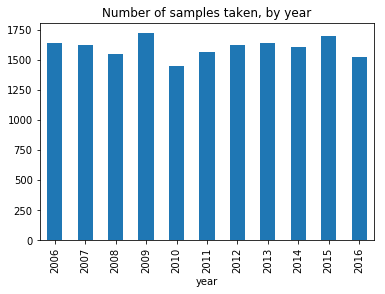

In [208]:
# Graph number of samples taken each year
beach_rows.groupby('year').count()['Beach'].plot(kind='bar', title="Number of samples taken, by year")

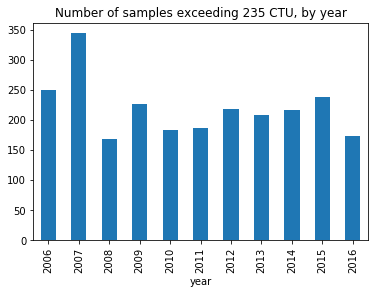

In [209]:
# Graph number of samples exceeding 235 by year
beach_rows.loc[beach_rows['sample_reading'] >= 235].groupby('year').count()['Beach']\
    .plot(kind='bar', title='Number of samples exceeding 235 CTU, by year')

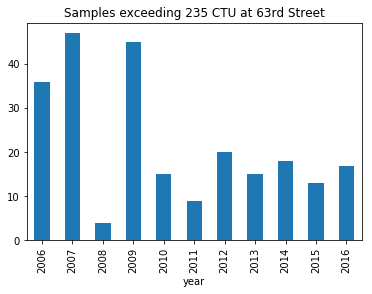

In [210]:
# Graph number of samples exceeding 235 by year FOR A GIVEN BEACH
beach_name = '63rd Street'
beach_rows.loc[(beach_rows['sample_reading'] >= 235) & (beach_rows['Beach'] == beach_name)].groupby('year').count()['Beach']\
    .plot(kind='bar', title='Samples exceeding 235 CTU at ' + beach_name)

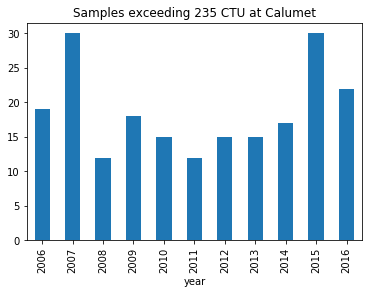

In [211]:
# 63rd Street has gotten a lot better over time!
# Calumet has not
beach_name = 'Calumet'
beach_rows.loc[(beach_rows['sample_reading'] >= 235) & (beach_rows['Beach'] == beach_name)].groupby('year').count()['Beach']\
    .plot(kind='bar', title='Samples exceeding 235 CTU at ' + beach_name)